## Part 3: Visualisations

In [2]:
%run "../scripts/outlier.py"

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/09/13 17:33:00 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/09/13 17:33:01 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
22/09/13 17:33:01 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.


Count before outliers:  14195505


Count after outlier exclusion 1:  13614675


In [25]:
%run "../scripts/ETL.py"

- Visualisations to compare number of male vs female consumers DONE
- Visualisations to compare number of male vs female transactions DONE
- Visualisations to compare number of transactions by state DONE
- Visualisations to show number of transactions by month DONE ISH
- Visualisations to show number of transactions by categories (need to preprocess merchants further)

#### Distribution of gender amongst transactions

<AxesSubplot:xlabel='gender'>

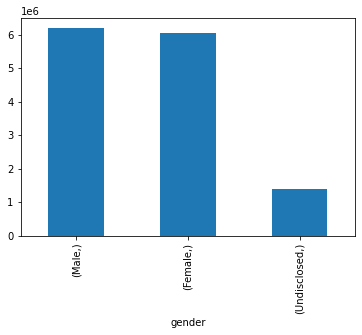

In [18]:
import matplotlib.pyplot as plt

genders = internal1.select("gender")
genderspd = genders.toPandas()
genderspd.value_counts().plot(kind='bar')

#### Distribution of genders amongst consumers

<AxesSubplot:xlabel='gender'>

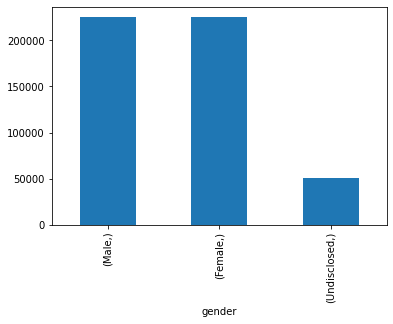

In [26]:
import matplotlib.pyplot as plt

genders = tbl_consumer.select("gender")
genderspd = genders.toPandas()
genderspd.value_counts().plot(kind='bar')

#### Distribution of total revenue for each merchant from online purchases

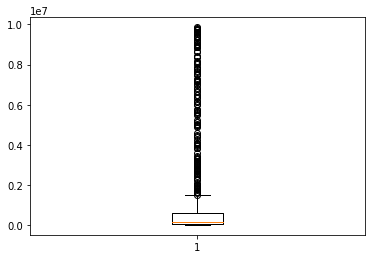

In [23]:
total_revenue = aggregated_revenue_pd['sum(dollar_value)']
fig = plt.figure()
plt.boxplot(total_revenue)
plt.show()

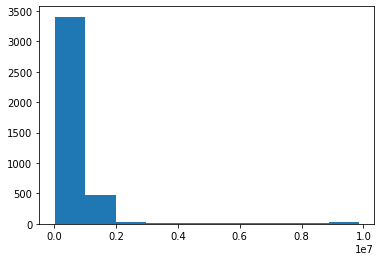

In [24]:
plt.hist(total_revenue)
plt.show()

#### Distributions of transactions by state

<AxesSubplot:xlabel='state'>

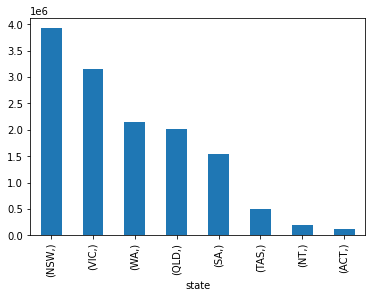

In [27]:
import matplotlib.pyplot as plt

state = internal1.select("state")
statepd = state.toPandas()
statepd.value_counts().plot(kind='bar')

#### Number of transactions made by month

<AxesSubplot:xlabel='order_datetime'>

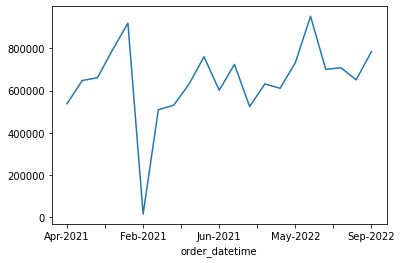

In [35]:
# date = internal1.select("order_datetime")
# datepd = date.toPandas()
# datepd["counts"] = 1
datepd.groupby(pd.to_datetime(datepd["order_datetime"]).dt.strftime('%b-%Y'), sort=True)["count"].size().plot()
# print(type(datepd["order_datetime"][0]))

In [39]:
dates = datepd.groupby(pd.to_datetime(datepd["order_datetime"]).dt.strftime('%b-%Y'), sort=True)
dates.head(5)

,order_datetime,count
0,2021-05-21,1
1,2021-08-22,1
2,2021-08-27,1
3,2021-05-21,1
4,2021-08-21,1
...,...,...
786,2021-02-28,1
1503,2021-02-28,1
1506,2021-02-28,1
3673,2021-02-28,1


In [63]:
datepd["order_datetime"] = pd.to_datetime(datepd["order_datetime"]).dt.to_period('M')

In [71]:
datepd_groupby = datepd.groupby(["order_datetime"]).count().reset_index()
datepd_groupby

,order_datetime,count
0,2021-02,16403
1,2021-03,523961
2,2021-04,537936
3,2021-05,610532
4,2021-06,601284
5,2021-07,628500
6,2021-08,660593
7,2021-09,650453
8,2021-10,699953
9,2021-11,950550


<AxesSubplot:xlabel='order_datetime'>

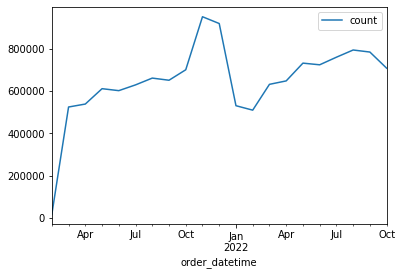

In [73]:
datepd_groupby.plot(x = "order_datetime")